<a href="https://colab.research.google.com/github/kartik177/kartik177.github.io/blob/master/180110038.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [32]:
class Neural_Network():
    def __init__(self, neurons, Activations): 
        # arguments: an array "neurons" consist of number of neurons for each layer, 
        # an array "activations" consisting of activation functions used for the hidden layers and output layer
        self.inputSize = neurons[0] # Number of neurons in input layer
        self.outputSize = neurons[-1] # Number of neurons in output layer
        self.layers = len(neurons)
        self.weights = [] #weights for each layer
        self.biases = [] #biases in each layer 
        self.layer_activations = [] #activations in each layer
        for i in range(len(neurons)-1): 
            self.weights.append(np.random.rand(neurons[i+1],neurons[i])) #weight matrix between layer i and layer i+1
            self.biases.append(np.random.rand(neurons[i+1],1))
            self.layer_activations.append(Activations[i]) #activations for each layer
        
            
    def sigmoid(self, z): # sigmoid activation function
        #Fill in the details to compute and return the sigmoid activation function                  
        return 1.0/(1.0+np.exp(-z))
    
    def sigmoidPrime(self,z): # derivative of sigmoid activation function
        #Fill in the details to compute and return the derivative of sigmoid activation function
        return self.sigmoid(z)*(1-self.sigmoid(z))

                          
    def tanh(self, z): # hyperbolic tan activation function
        #Fill in the details to compute and return the tanh activation function 
        return (np.exp(z)- np.exp(-z))/(np.exp(z)+np.exp(-z))                 
        
    
    def tanhPrime(self,x): # derivative of hyperbolic tan activation function
        #Fill in the details to compute and return the derivative of tanh activation function
        return (1 -(self.tanh(x))**2)
                          
    def linear(self, z): # Linear activation function
        #Fill in the details to compute and return the linear activation function                                    
        return z
    
    def linearPrime(self,x): # derivative of linear activation function
        #Fill in the details to compute and return the derivative of activation function  
        return 1                                                    
        if self.ReLU(z) > 0 :
            return 1
        else:
            return 0
    

    def ReLU(self,z): # ReLU activation function
        #Fill in the details to compute and return the ReLU activation function 
        k = max(z,0)
        return k
    
                      
        
    
    def ReLUPrime(self,z): # derivative of ReLU activation function
        #Fill in the details to compute and return the derivative of ReLU activation function
        if self.ReLU(z) > 0 :
            return 1
        else:
            return 0                 
        
    
    def forward(self, a): # function of forward pass which will receive input and give the output of final layer
        # Write the forward pass using the weights and biases to find the predicted value and return them.
        layer_activations_a = [a] #store the input as the input layer activations
        layer_dot_prod_z = []
        for i, param in enumerate(zip(self.biases, self.weights)):
            b, w = param[0], param[1]
            if self.layer_activations[i].lower()=='sigmoid':
                z = np.dot(w, a)+b
                a = self.sigmoid(z)
            elif self.layer_activations[i].lower()=='relu':
                pass
            elif self.layer_activations[i].lower()=='tanh':   
                pass
            elif self.layer_activations[i].lower()=='linear':
                pass
            layer_dot_prod_z.append(z)    
            layer_activations_a.append(a)
        return a, layer_dot_prod_z, layer_activations_a
                          
            
    
    def backward(self, x, y, zs, activations): # find the loss and return derivative of loss w.r.t every parameter
        # Write the backpropagation algorithm here to find the gradients of weights and biases and return them.
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]
        # b, w 3*1
        # backward pass
        if self.layer_activations[-1].lower()=='sigmoid':
            delta = (activations[-1] - y) *  self.sigmoidPrime(zs[-1])
        elif self.layer_activations[-1].lower()=='relu':
            delta = (activations[-1] - y) * self.ReLUPrime(zs[-1])
        elif self.layer_activations[-1].lower()=='tanh':   
            delta = (activations[-1] - y) *  self.tanhPrime(zs[-1])

        elif self.layer_activations[-1].lower()=='linear':
            delta = (activations[-1] - y) *  self.linearPrime(zs[-1])

        grad_b[-1] = delta
        grad_w[-1] = delta*(activations[-2].transpose())
        delta = delta*((self.weights[-1]).transpose())   
        
        for l in range(2, self.layers): # Here l is in backward sense i.e. last l th layer
            z = zs[-l]
            
            if self.layer_activations[-l].lower()=='sigmoid':
                prime = self.sigmoidPrime(z)
            elif self.layer_activations[-l].lower()=='relu':
                prime = self.ReLUPrime(z)
            elif self.layer_activations[-l].lower()=='tanh':   
                prime = self.tanhPrime(z)
            elif self.layer_activations[-l].lower()=='linear':
                prime = self.linearPrime(z)
                

            p = np.array(prime[:,0])
            #Compute delta, gradients of b and w 
            
           
            k =np.matmul((self.weights[-l].transpose()),np.diag(p))
            grad_b[-l] = delta
            grad_w[-l] = np.matmul((np.diag(p)),delta)
            grad_w[-l] = np.matmul(grad_w[-l],(activations[-l-1].transpose()))
            delta = np.matmul(k,delta)
        return (grad_b, grad_w)    
                          
                      

    def update_parameters(self, grads, learning_rate): # update the parameters using the gradients
        # update weights and biases using the gradients and the learning rate
        
        grad_b, grad_w = grads[0], grads[1]       
        
        #Implement the update rule for weights  and biases
        self.weights = self.weights - np.multiply(learning_rate,grad_w)
        self.biases = self.biases - np.multiply(learning_rate,grad_b)
        
    def loss(self, predicted, actual):
        #Implement the loss function
        return 0.5*(predicted-actual)**2
    def cross_entropy(self, predicted, actual):
        KeyboardInterrupt = -actual*np.log(predicted)
        return sum(K)   
                     
    def train(self, X, Y, minibatch=False): # receive the full training data set
        lr = 1e-3         # learning rate
        epochs = 1000     # number of epochs
        loss_list = []
        CE_loss_list = []
        if minibatch==False:
            for e in range(epochs): 
                losses = []
                CE_losses = []
                for q in range(len(X)):
                    train_x = np.resize(X[q],(X[q].shape[0],1)) 
                    if not onehotencoded: 
                        train_y = np.resize(Y[q],(1,1)) 
                    else:
                        train_y = np.resize(np.argmax(Y[q]),(1,1)) 
                    out, dot_prod_z, activations_a = self.forward(train_x)
                    loss = self.loss(out, train_y)
                    CE_loss = self.cross_entropy(out,train_y)
                    grads = self.backward(train_x, train_y, dot_prod_z, activations_a) # find the gradients using backward pass
                    self.update_parameters(grads, lr)
                    losses.append(loss)
                    CE_losses.append(CE_loss)
                loss_list.append(np.mean(np.array(losses)))
                CE_loss_list.append(np.mean(np.array(CE_losses)))
                print(f'Epoch: {e} Loss: {np.mean(np.array(losses))}')
        else:
            minibatchsize = 20
            create_minibatches(X,Y,minibatchsize)
            
            for e in range(epochs):
                #Complete the training code with minibatches 
                losses = []
                CE_losses = []
                minibatch = create_minibatches(X,Y,minibatchsize)
                for minibatch in minibatch:
                    x_mini,y_mini = minibatch
                    x_train = np.resize(x_mini,(minibatchsize, x_mini.shape[1]))
                    y_train = []
                    for i in range(len(y_mini)):
                        if onehotencoded:
                            train_y = np.resize(np.argmax(y_mini[i]),(1,1)) 
                            y_train.append(train_y)
                        else:
                            pass
                        
                    output, dot_prod_z ,activations_a = self.forward(x_train)
                    loss = self.loss(output,y_train) 
                    CE_loss = self.cross_entropy(out,train_y)
                    grads = self.backward(x_train,y_train, dot_prod_z , activations_a)
                    self.update_parameters(grads, lr)
                    losses.append(loss)
                    CE_losses.append(CE_loss)
                loss_list.append(np.mean(np.array(losses)))
                CE_loss_list.append(np.mean(np.array(CE_losses)))
                print(f'Epoch: {e} Loss: {np.mean(np.array(losses))} CE_Loss: {np.mean(np.array(CE_losses))}')
        return loss_list
        
    def predict(self, x):
        print ("Input : \n" + str(x))
        prediction,_,_ = self.forward(x)
        print ("Output: \n" + str(prediction))


In [33]:
# a method for creating one hot encoded labels 
def onehotencoding(Y):
    Data = sklearn.datasets.load_digits(10,True)
    X_data = Data[0]
    Y_data = Data[1]
    Y = []
    for i in len(Y_data):
        k = [0]*10
        k[Y_data[i]] = 1
        Y.append(k)
        
    return Y

#a method to create minibatches 
def create_minibatches(X,Y,minibatchsize):
    numbatches = int(np.ceil(len(X)/minibatchsize))
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    X_minibatches = []
    Y_minibatches = [] 
    for i in range(numbatches):
        idx_minibatch = idx[i*minibatchsize:min(len(idx),(i+1)*minibatchsize)]
        xn = np.take(X,idx_minibatch,axis=0) 
        yn = np.take(Y,idx_minibatch,axis=0)
        X_minibatches.append(xn)
        Y_minibatches.append(yn)
    return X_minibatches, Y_minibatches

def test_create_minibatches():
    X = []
    Y = []
    inputsize = 3
    minibatch = False
    onehotencoded = False
    n_batch = 20
    batch_size = 5
    for i in range(50):
        if(i % 2 == 0):
            X.append([np.random.randint(1,10) for i1 in range(inputsize)])
            Y.append(1)
        else:
            X.append([np.random.randint(-10,1) for i1 in range(inputsize)])
            Y.append(0)
    X = np.array(X)
    Y = np.array(Y)

    X_mb, Y_mb = create_minibatches(X,Y,6)
    print(X_mb, Y_mb)
#test_create_minibatches()

# Generating some training data

In [34]:
X = []
Y = []
inputsize = 3
minibatch = False
onehotencoded = False
n_batch = 20
batch_size = 5
for i in range(500):
    if(i % 2 == 0):
        X.append([random.randint(1,10) for i1 in range(inputsize)])
        Y.append(1)
    else:
        X.append([random.randint(-10,1) for i1 in range(inputsize)])
        Y.append(0)
X = np.array(X)
Y = np.array(Y)
if onehotencoded:
    Y = onehotencoding(Y)

if minibatch==False:
    train_X = X
    train_Y = Y
else:
    train_X = []
    train_Y = []
    for i in range(n_batch):
        xn, yn = create_minibatch(X,Y,batch_size)
        train_X.append(xn)
        train_Y.append(yn)
    train_X = np.concatenate(train_X, axis=0).reshape((n_batch,batch_size,inputsize))
    train_Y = np.concatenate(train_Y, axis=0).reshape((n_batch,batch_size,-1))

In [14]:
print(train_X.shape, train_Y.shape)

(500, 3) (500,)


# Defining the network

In [35]:
#D_in is input dimension
#H1 is dimension of first hidden layer 
#H2 is dimension of second hidden layer
#D_out is output dimension.
D_in, H1, H2, D_out = inputsize, 10, 5, 1 #You can add more layers if you wish to 

neurons = [D_in, H1, H2, D_out] # list of number of neurons in the layers sequentially.
activation_functions = ['linear','linear','tanh''Relu', 'sigmoid'] #activations in each layer (Note: the input layer does not have any activation)
my_neuralnet = Neural_Network(neurons, activation_functions )


# Training the network

In [36]:
loss = my_neuralnet.train(train_X,train_Y,minibatch=minibatch)

UnboundLocalError: ignored

# Prediction for a data point after the training

In [17]:
my_neuralnet.predict(np.array([8,4,9]).reshape((3,1)))

Input : 
[[8]
 [4]
 [9]]
Output: 
[[0.89162745]]


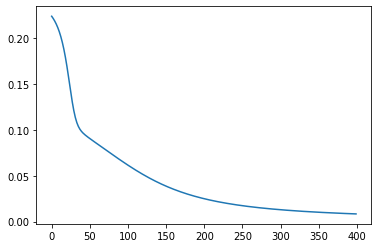

In [18]:
plt.plot(loss)
plt.show()

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()


print(digits.data.shape)
loss

(1797, 64)


[0.2236634729954681,
 0.2224939460621803,
 0.22123686943416557,
 0.21988364912494643,
 0.21842474689063465,
 0.21684959079246252,
 0.21514648833617236,
 0.21330254871765572,
 0.21130362399531816,
 0.20913428354498853,
 0.20677784226132584,
 0.2042164709619671,
 0.20143142750945867,
 0.19840345912963514,
 0.19511343939277148,
 0.1915433151398298,
 0.18767744492567404,
 0.1835044038023045,
 0.17901929804258856,
 0.17422656274281162,
 0.16914308988588292,
 0.16380134720482142,
 0.15825191487597604,
 0.1525646454070111,
 0.14682755289040433,
 0.14114270630138645,
 0.1356189471068899,
 0.13036213523111104,
 0.12546457906728617,
 0.12099588037859306,
 0.11699724569199854,
 0.1134803572824983,
 0.11043056709738114,
 0.10781307557155159,
 0.10558029764627125,
 0.10367882360371843,
 0.10205497528607381,
 0.10065860032585917,
 0.09944521906847262,
 0.09837688097869358,
 0.09742214401432313,
 0.09655553958598409,
 0.09575679382532998,
 0.09500998373065327,
 0.09430273249193749,
 0.09362549587445,